/Users/sami/Projects/projet_tutore/lastdataset/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


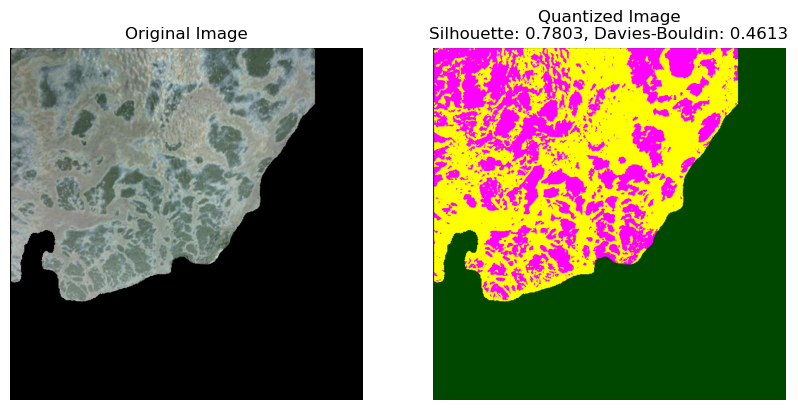

/Users/sami/Projects/projet_tutore/lastdataset/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


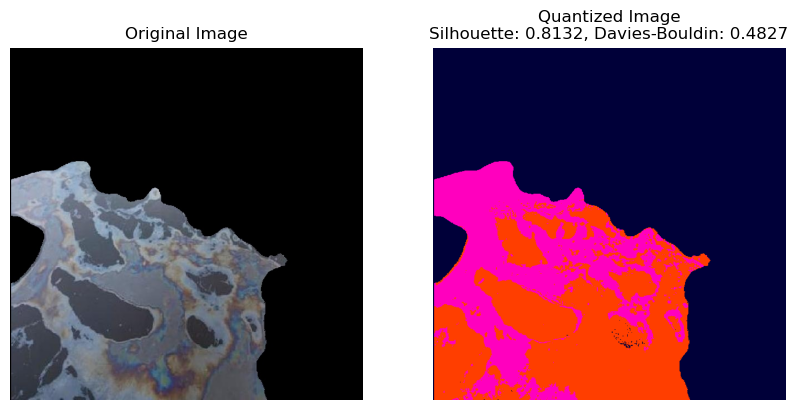

/Users/sami/Projects/projet_tutore/lastdataset/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Path to the directories containing images and their masks
image_directory = './imagenet/'
image_files = os.listdir(image_directory)
for image_file in image_files:
    # Load the original image
    image = cv2.imread(os.path.join(image_directory, image_file))
 # Replace 'your_image.jpg' with the path to your image
    im pixels = image.reshape(-1, 3)

# Reduce dimensionality using PCA
    pca = PCA(n_components=3)
    pca.fit(pixels)
    transformed = pca.transform(pixels)

# Apply K-Means clustering
    kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
    kmeans.fit(transformed)age = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB (if necessary)

# Flatten the image to get pixels
   

# Replace each pixel with its cluster's centroid
    quantized_pixels = kmeans.cluster_centers_[kmeans.predict(transformed)]
    quantized_image = quantized_pixels.reshape(image.shape)
        
    silhouette = silhouette_score(transformed, kmeans.predict(transformed))
    davies_bouldin = davies_bouldin_score(transformed, kmeans.predict(transformed))
   
    

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Quantized Image\nSilhouette: {silhouette:.4f}, Davies-Bouldin: {davies_bouldin:.4f}')
    plt.imshow(quantized_image)
    plt.axis('off')

    plt.show()


In [1]:
import os
import pandas as pd

def create_csv_with_existing_files(images_folder, masks_folder, csv_path):
    # Get the list of filenames in both folders
    image_files = set(os.listdir(images_folder))
    mask_files = set(os.listdir(masks_folder))

    # Find common files in both folders
    common_files = list(image_files & mask_files)
    common_files.sort()  # Optional, sort the files

    # Create DataFrame with image and mask columns
    df = pd.DataFrame({
        'image': [os.path.join(images_folder, f) for f in common_files],
        'mask': [os.path.join(masks_folder, f) for f in common_files]
    })

    # Save the DataFrame to a CSV file
    df.to_csv(csv_path, index=False)
    return csv_path

# Paths to the image and mask folders
images_folder = "./image"
masks_folder = "./mask"

# Path where to save the new CSV
new_csv_path = "./_image_mask_paths.csv"

# Create and save the CSV file
create_csv_with_existing_files(images_folder, masks_folder, new_csv_path)


'./_image_mask_paths.csv'